# LOAD DATASET CLEAN

In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import skew
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

- Đọc dữ liệu đã làm sạch

In [43]:
df = pd.read_csv("../Dataset_Car/train-data-clean.csv")

- Xem thông tin dataset

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6019 non-null   float64
 7   Engine             6019 non-null   float64
 8   Power              6019 non-null   float64
 9   Seats              6019 non-null   float64
 10  Price              6019 non-null   float64
 11  Brand              6019 non-null   object 
 12  Model              6019 non-null   object 
 13  Age                6019 non-null   int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 658.5+ KB


In [45]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Age
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1620.509221,112.883539,5.276790,9479.468350,10.641801
std,3.269742,9.126884e+04,4.581528,599.635458,53.283701,0.806346,11187.917112,3.269742
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,440.000000,5.000000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,78.000000,5.000000,3500.000000,8.000000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5640.000000,10.000000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9950.000000,13.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160000.000000,26.000000


In [46]:
df.describe(include="O")

,Location,Fuel_Type,Transmission,Owner_Type,Brand,Model
count,6019,6019,6019,6019,6019,6019
unique,11,5,2,4,31,212
top,Mumbai,Diesel,Manual,First,Maruti,Swift
freq,790,3205,4299,4929,1211,353


# EDA

## 1. Kiểm tra mising value và kiểu dữ liệu

- Kiếm tra missing value

In [47]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
Age                  0
dtype: int64

- Kiểm tra kiểu dữ liệu

In [48]:
print(df.dtypes)

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Brand                 object
Model                 object
Age                    int64
dtype: object


In [49]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Age
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1750.0,Maruti,Wagon,14
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12500.0,Hyundai,Creta,9
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4500.0,Honda,Jazz,13
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6000.0,Maruti,Ertiga,12
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17740.0,Audi,A4,11


## 2. Outlier

- Tính toán các phân vị (quantiles) cho tất cả các cột dạng số. Đây là một cách để phát hiện các ngoại lệ (outliers).

In [50]:
df.select_dtypes(include=['number']).quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999 , 1])

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Age
0.250,2011.0,34000.0,15.17,1198.000,78.00,5.0,3500.0,8.0
0.500,2014.0,53000.0,18.15,1493.000,97.70,5.0,5640.0,10.0
0.750,2016.0,73000.0,21.10,1969.000,138.03,5.0,9950.0,13.0
0.900,2017.0,97000.0,24.00,2494.000,184.00,7.0,22500.0,15.0
0.950,2018.0,120000.0,25.47,2982.000,204.00,7.0,32446.0,17.0
0.990,2019.0,172829.0,28.09,3161.360,282.00,8.0,56000.0,20.0
0.999,2019.0,442390.0,33.44,4999.118,450.00,9.0,89910.0,24.0
1.000,2019.0,6500000.0,33.54,5998.000,560.00,10.0,160000.0,26.0


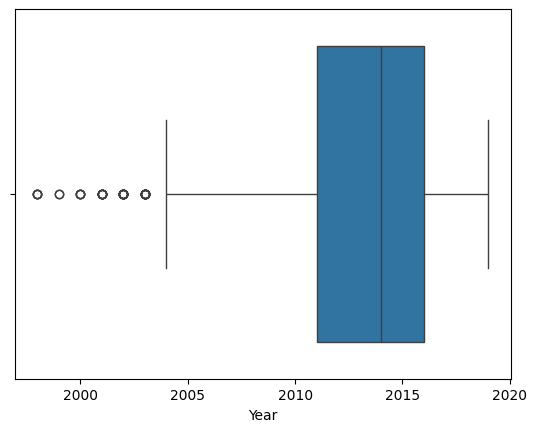

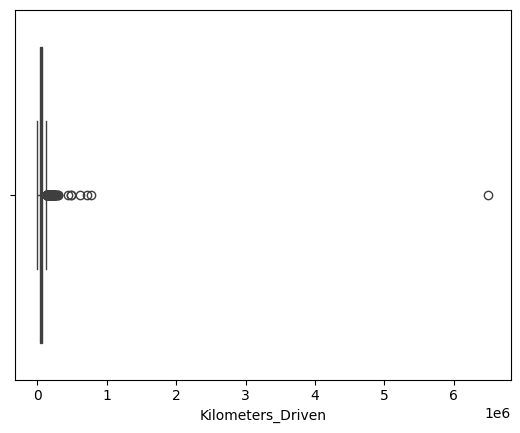

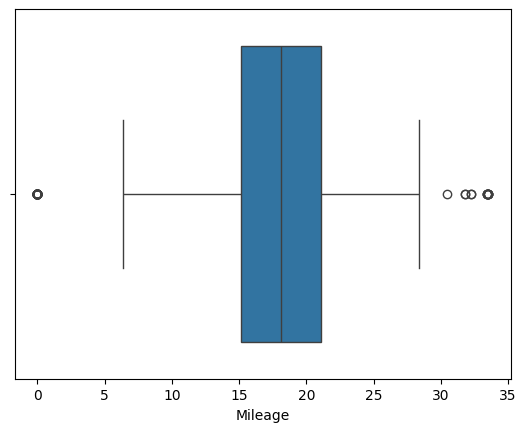

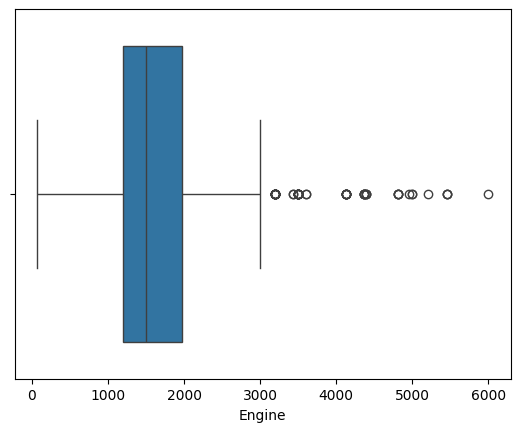

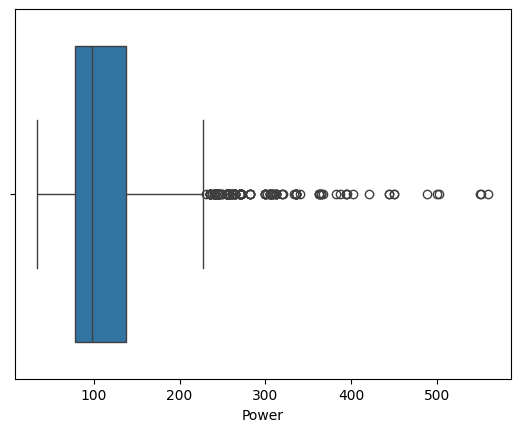

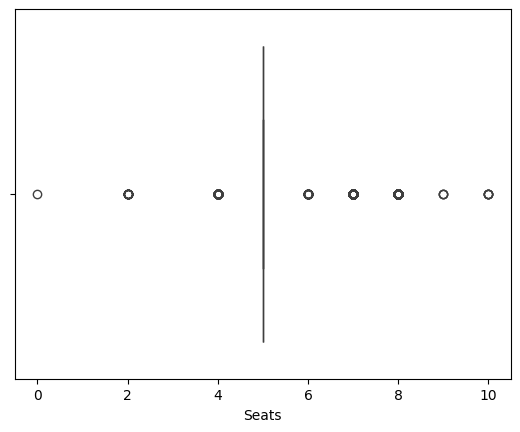

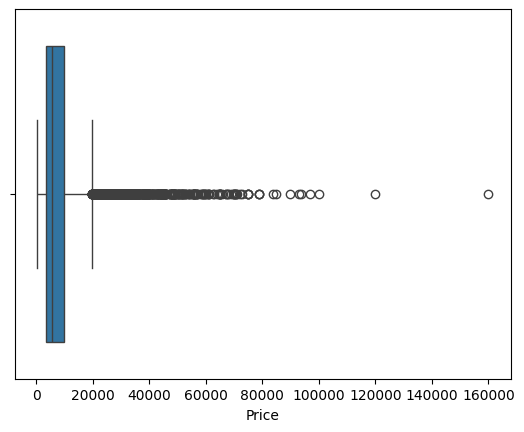

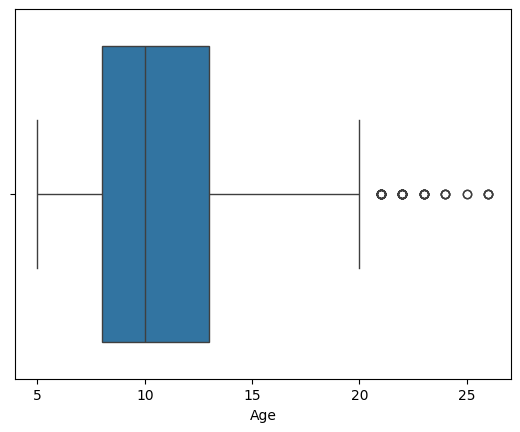

In [51]:
columns = df.select_dtypes(include=['number'])

for col in columns:
    sns.boxplot(x=df[col], data=df)
    plt.show()

- Sau khi xem xét:
    - Kilometers_Driven: Cần loại bỏ các giá trị vượt quá phân vị 99%.
    - Engine: Kiểm tra các động cơ trên 4999 cc.
    - Power: Loại bỏ giá trị vượt quá phân vị 99.9%.
    - Price: Giới hạn ở phân vị 99%.
    - Age: Giới hạn ở khoảng 20 năm.
    - Seats: Loại bỏ số ghế là 0.

In [52]:
df = df[df["Kilometers_Driven"] < df["Kilometers_Driven"].quantile(0.999)]
df = df[df["Engine"] < 4999]
df = df[df["Power"] < df["Power"].quantile(0.999)]
df = df[df["Price"] < df["Price"].quantile(0.99)]
df = df[df["Age"] < 20]
df = df[df["Seats"] != 0]

In [53]:
df.select_dtypes(include=['number']).quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999 , 1]) 

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Age
0.250,2012.0,34000.00,15.40,1198.0,78.000,5.0,3500.0,8.0
0.500,2014.0,53000.00,18.30,1493.0,97.700,5.0,5640.0,10.0
0.750,2016.0,72391.75,21.10,1968.0,138.000,5.0,9750.0,12.0
0.900,2017.0,95000.00,24.00,2494.0,181.000,7.0,21000.0,15.0
0.950,2018.0,119000.00,25.47,2967.0,197.200,7.0,29935.0,16.0
0.990,2019.0,168562.75,28.09,2993.0,259.350,8.0,45000.0,18.0
0.999,2019.0,250000.00,33.44,4134.0,335.896,8.0,54000.0,19.0
1.000,2019.0,300000.00,33.54,4806.0,394.300,10.0,55700.0,19.0


## 3. Phân tích các biến số trong bộ dữ liệu biến nào tương đối gần mức đối xứng, các biến nào đang mất cân đối.

- Xem danh sách các biến số mất đối xứng

In [54]:
# hàm kiểm tra đối xứng mean, median, mode
def check_symmetry_of_series(series, percent=0.1):
  mean = series.mean()
  median = series.median()
  mode = series.mode()

  if len(mode)==1:
    if abs(median - mean) <= percent*median and abs(median - mode[0]) <= percent*median:
      return True
    else: return False
  else:
    return False

# kiểm tra tất cả các biến số
def check_symmetry_of_df(numeric_df):
  d = {}
  for col in numeric_df.columns:
    d[col] = check_symmetry_of_series(numeric_df[col])
  return d

In [55]:
numeric_df = df.select_dtypes(include=['number'])
result = check_symmetry_of_df(numeric_df)
result_symmetry = [x for x in result if result[x]==True]
result_not_symmetry = [x for x in result if result[x]==False]
print('Danh sách biến số gần mức đối xứng: ', result_symmetry)
print('Danh sách biến số đang bị mất cân đối: ', result_not_symmetry)

Danh sách biến số gần mức đối xứng:  ['Year', 'Mileage', 'Seats', 'Age']
Danh sách biến số đang bị mất cân đối:  ['Kilometers_Driven', 'Engine', 'Power', 'Price']


- Biểu đồ phân phối của các biến số

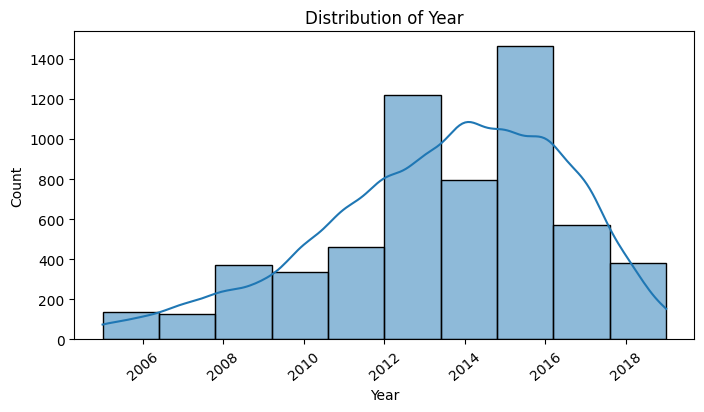

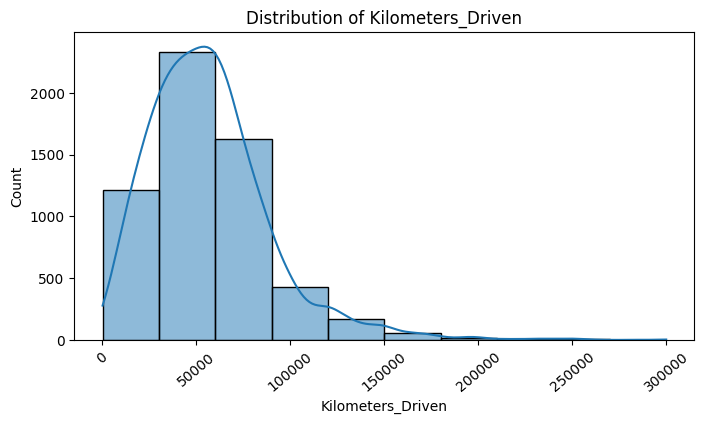

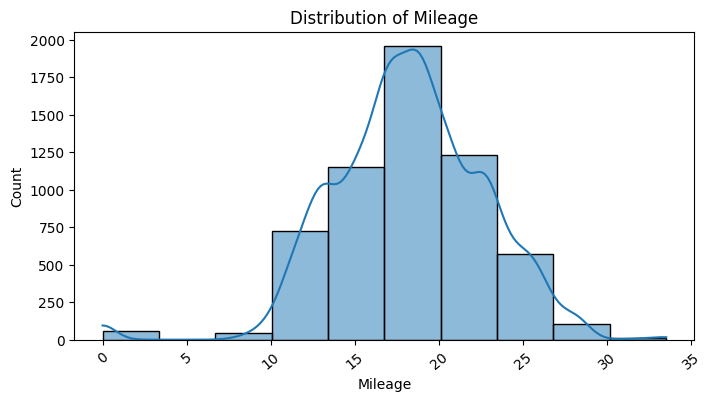

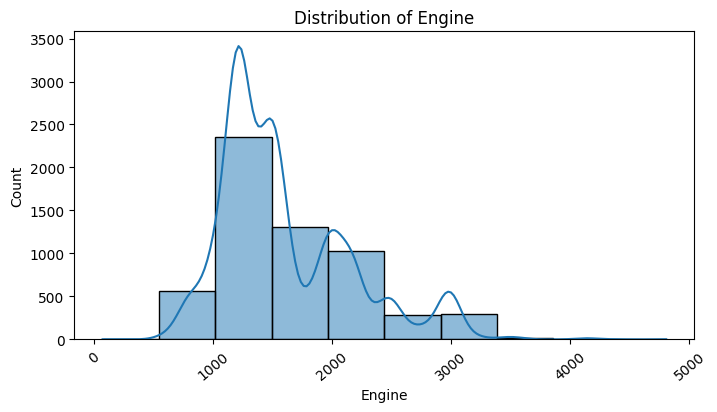

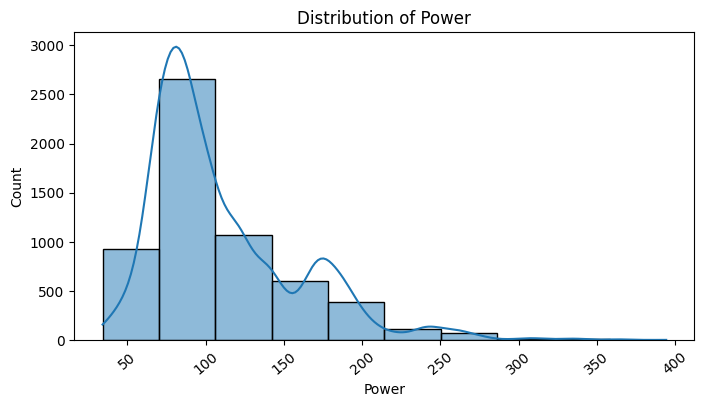

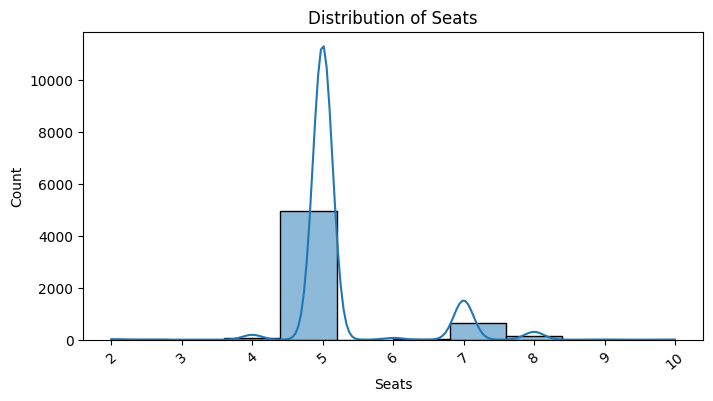

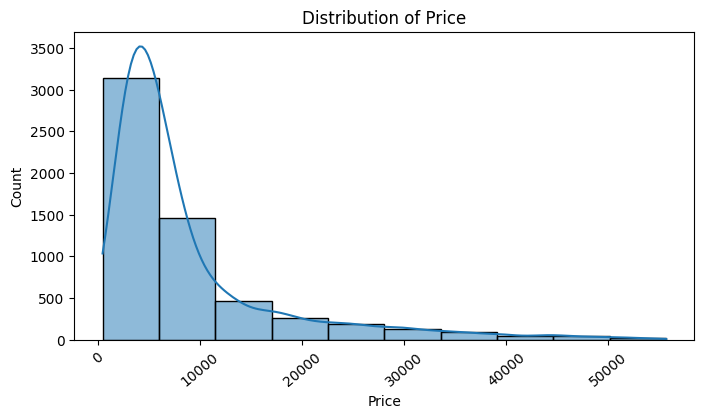

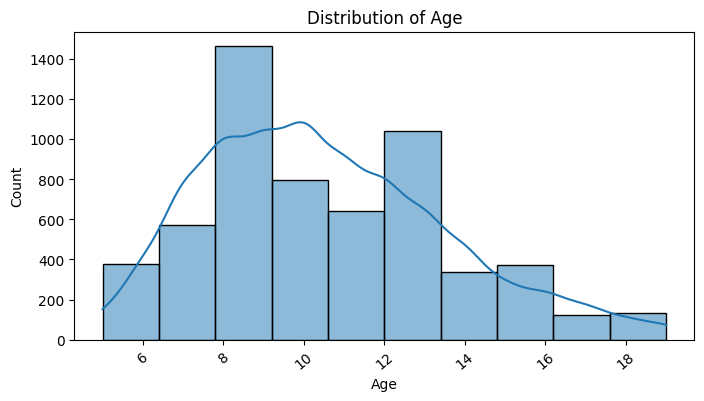

In [56]:
for column in numeric_df:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], bins=10, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.xticks(rotation=40)
    plt.show()

- Thực hiện xử lý các biến 'Kilometers_Driven', 'Engine', 'Power', 'Price'. Đầu tiên kiểm tra xem các biến có mức độ lệch thế nào

In [57]:
# Kiểm tra mức độ lệch
numeric_cols = ['Kilometers_Driven', 'Engine', 'Power', 'Price']
skew_values = df[numeric_cols].apply(skew).sort_values(ascending=False)
print("Skewness of variables:")
print(skew_values)


Skewness of variables:
Price                2.327440
Kilometers_Driven    1.467403
Power                1.381486
Engine               1.128865
dtype: float64


- Kết quả kiểm tra Skewness của các biến cho thấy tất cả đều lệch phải

In [58]:
# Áp dụng Log Transformation
df['Price'] = df['Price'].apply(lambda x: np.log1p(x))  # log(x + 1) để tránh log(0)
df['Kilometers_Driven'] = df['Kilometers_Driven'].apply(lambda x: np.log1p(x))

In [59]:
# Áp dụng Square Root Transformation
df['Power'] = df['Power'].apply(lambda x: np.sqrt(x))
df['Engine'] = df['Engine'].apply(lambda x: np.sqrt(x))

In [60]:
# Kiểm tra lại Skewness
skew_after = df[['Price', 'Kilometers_Driven', 'Power', 'Engine']].apply(skew).sort_values(ascending=False)
print("Skewness after transformation:")
print(skew_after)

Skewness after transformation:
Power                0.856606
Engine               0.727959
Price                0.388657
Kilometers_Driven   -1.436244
dtype: float64


- Sau khi thực hiện:
    - Power (Skewness = 0.86): Biến này hiện tại đã ở mức chấp nhận được (gần đối xứng). Không cần xử lý thêm.

    - Engine (Skewness = 0.73): Mức độ lệch đã giảm đáng kể và không cần xử lý thêm.

    - Price (Skewness = 0.39): Đã gần như đối xứng. Đây là kết quả tốt.

    - Kilometers_Driven (Skewness = -1.44): Sau khi log transformation, biến này bị lệch trái mạnh. Điều này xảy ra do dữ liệu ban đầu có nhiều giá trị nhỏ và gần 0, khiến log biến đổi không phù hợp.

- Sử dụng Box-Cox Transformation để xử lý biến Kilometers_Driven

In [61]:
from scipy.stats import boxcox
df['Kilometers_Driven'], _ = boxcox(df['Kilometers_Driven'] + 1e-5)  # Thêm giá trị nhỏ để tránh log(0)

In [62]:
from scipy.stats import skew
print("Skewness of Kilometers_Driven after Box-Cox:", skew(df['Kilometers_Driven']))

Skewness of Kilometers_Driven after Box-Cox: 0.03659333858310829


In [63]:
# Kiểm tra mức độ lệch sau khi thực hiện các bước trên
numeric_cols = ['Kilometers_Driven', 'Engine', 'Power', 'Price']
skew_values = df[numeric_cols].apply(skew).sort_values(ascending=False)
print("Skewness of variables:")
print(skew_values)

Skewness of variables:
Power                0.856606
Engine               0.727959
Price                0.388657
Kilometers_Driven    0.036593
dtype: float64


## 4. Phân tích thăm dò tìm ra các biến có khả năng ảnh hưởng đến giá xe

### - Các biến số quan trọng ảnh hưởng đến giá xe

- Tuơng quan giữa biến số và biến price theo thứ tự tăng dần

In [64]:
df.select_dtypes(include=['number']).corr()["Price"].apply(lambda x: abs(x)).sort_values()

Kilometers_Driven    0.189063
Seats                0.196868
Mileage              0.266637
Year                 0.474374
Age                  0.474374
Engine               0.684970
Power                0.768890
Price                1.000000
Name: Price, dtype: float64

- Power, Engine, Age là những biến có mối tương quan mạnh nhất với Price.

C:\Users\HP\AppData\Local\Temp\ipykernel_17412\3932347895.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_corr.index, y=price_corr.values, palette="viridis")


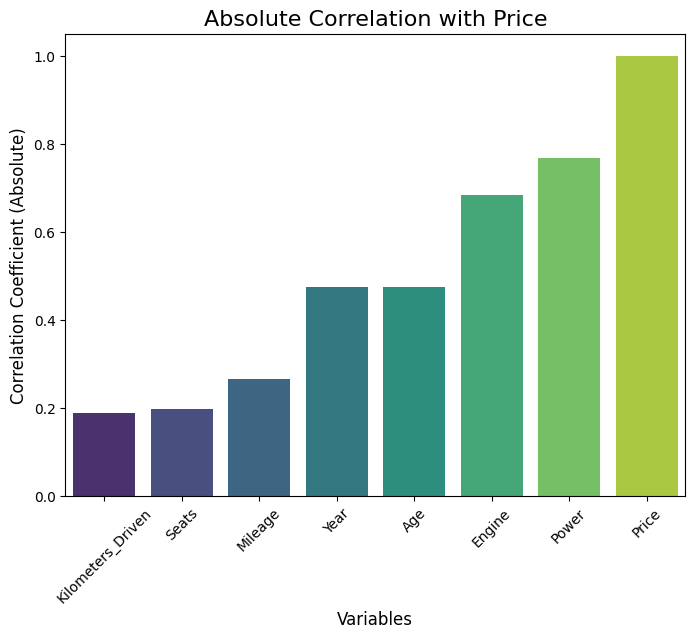

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính giá trị tương quan tuyệt đối với Price
price_corr = df.select_dtypes(include=['number']).corr()["Price"].apply(lambda x: abs(x)).sort_values()

# Vẽ biểu đồ thanh
plt.figure(figsize=(8, 6))
sns.barplot(x=price_corr.index, y=price_corr.values, palette="viridis")

# Tùy chỉnh biểu đồ
plt.title("Absolute Correlation with Price", fontsize=16)
plt.ylabel("Correlation Coefficient (Absolute)", fontsize=12)
plt.xlabel("Variables", fontsize=12)
plt.xticks(rotation=45)
plt.show()

- Bản đồ nhiệt tương quan cho biến kiểu số

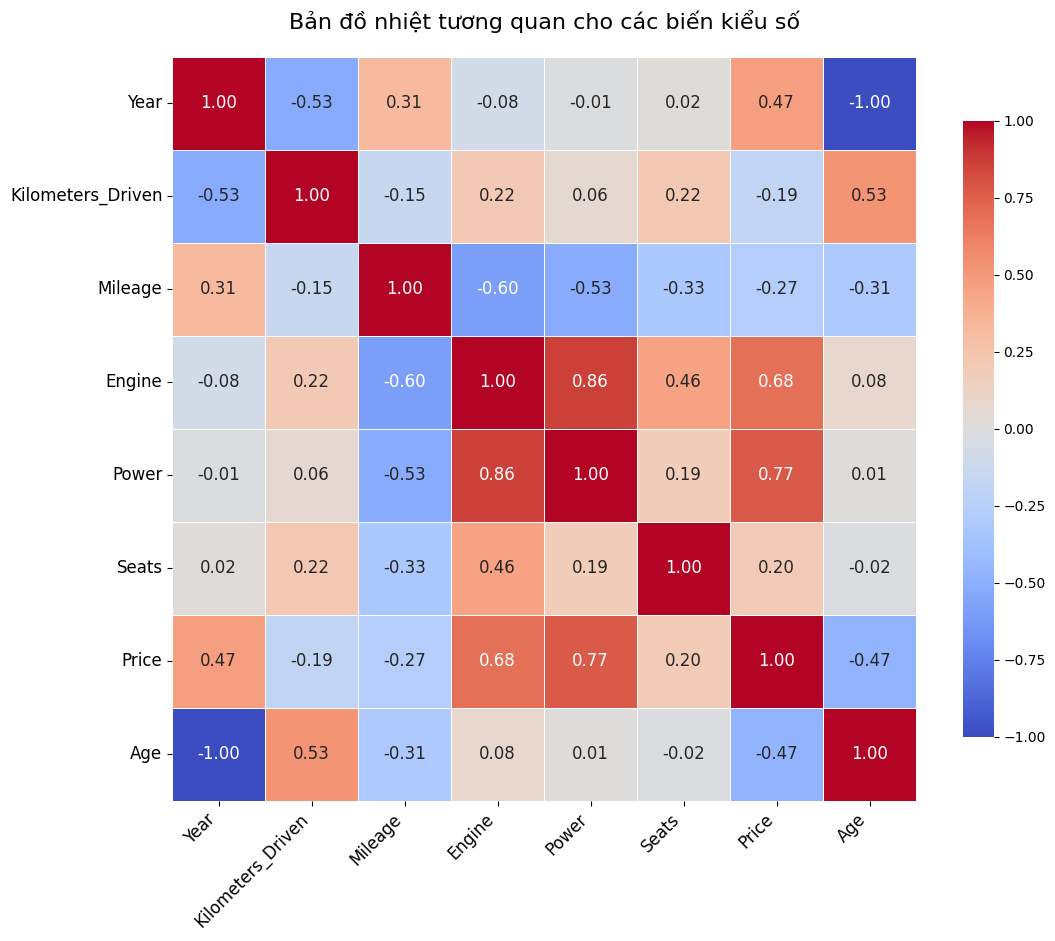

In [66]:
numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10)) 
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f', 
    linewidths=0.5, 
    annot_kws={'size': 12}, 
    cbar_kws={'shrink': 0.8},  
    square=True,  
    vmin=-1, vmax=1  
)

plt.title('Bản đồ nhiệt tương quan cho các biến kiểu số', fontsize=16, pad=20)

plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(rotation=0, ha='right', fontsize=12) 

plt.show()

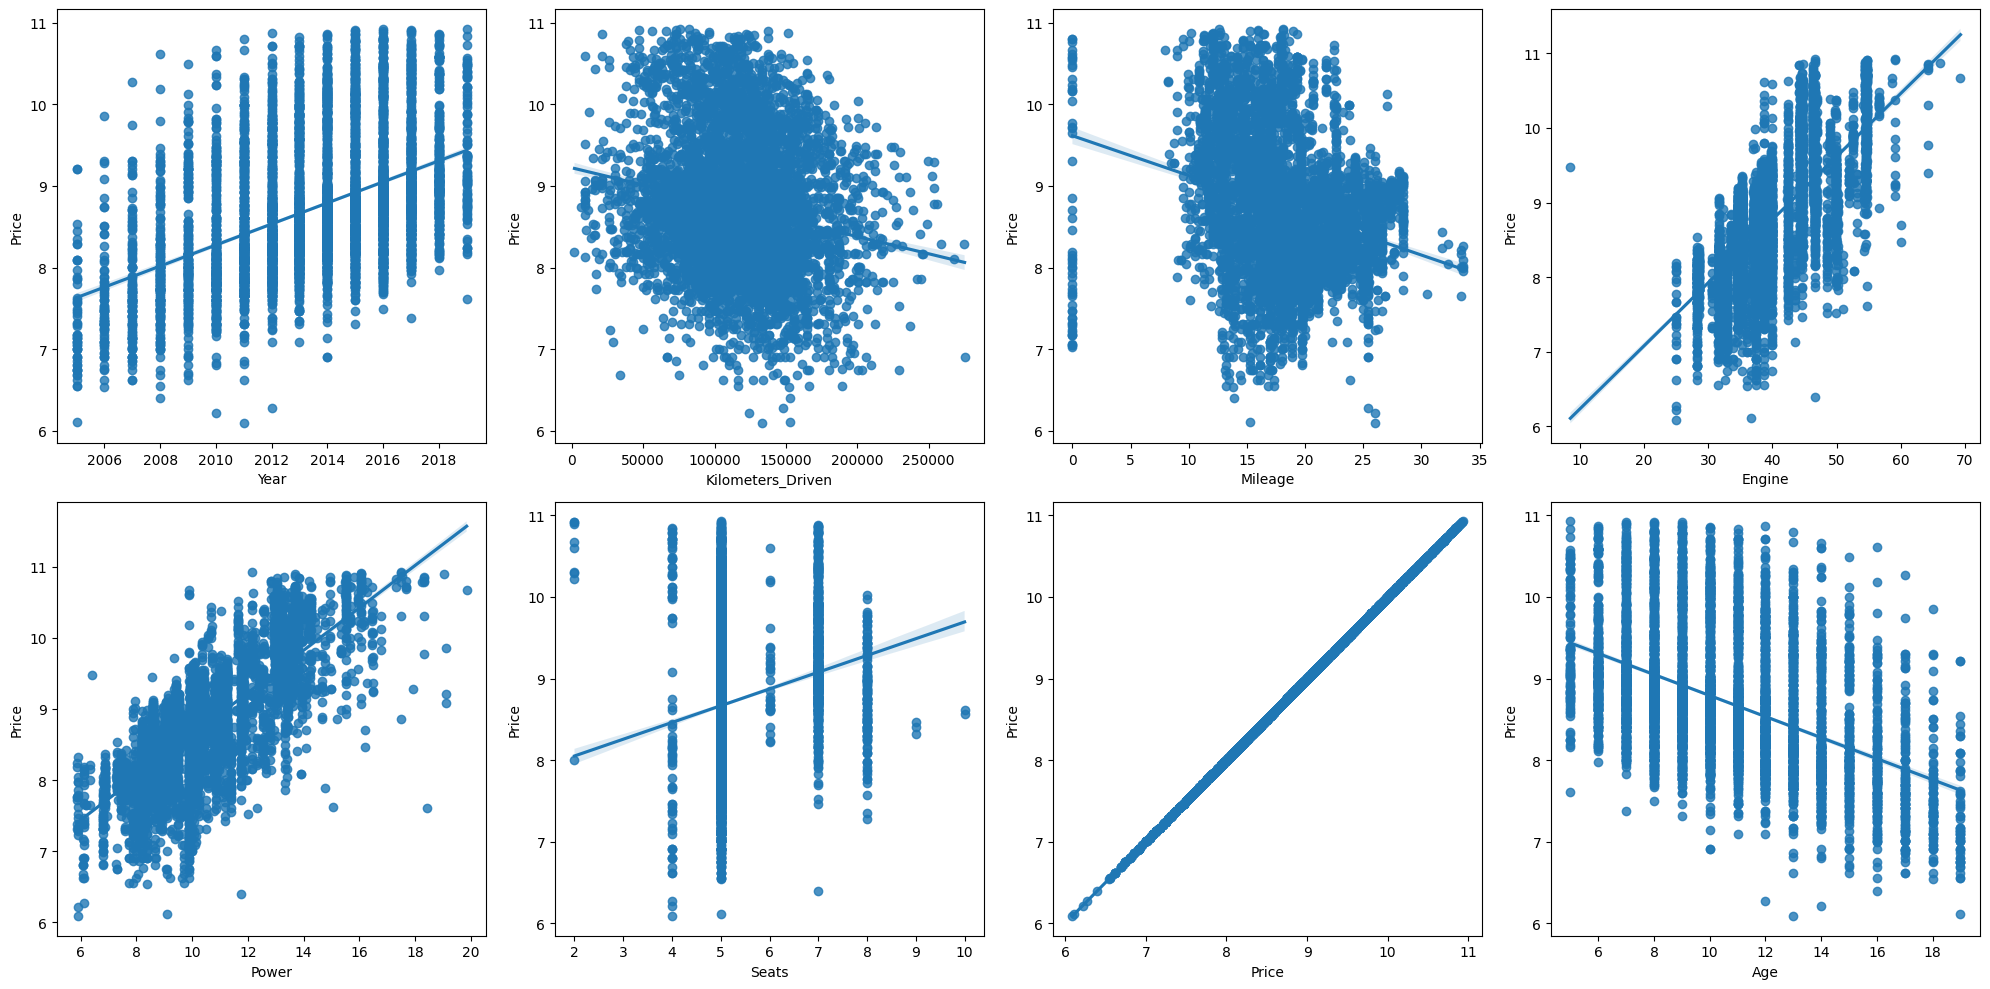

In [67]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
i, j = 0, 0

col = numeric_df.columns
for i in range(2):
    for j in range(4):
        sns.regplot(x=numeric_df[col[i*4+j]], y=numeric_df["Price"], data=numeric_df, ax=axes[i][j])

plt.tight_layout()
plt.show()

- Dựa vào các biểu đồ trên, ta thấy các biến 'Power', 'Engine', 'Age', 'Year', 'Mileage' có ảnh hưởng đến giá xe nhiều nhất.

In [68]:
df_numberic_important = ['Power', 'Engine', 'Age', 'Year', 'Mileage']

### - Các biến phân loại ảnh hưởng đến giá xe

In [69]:
from scipy.stats import f_oneway

categorical_columns = df.select_dtypes(include=['object']).columns

anova_results = {}
for col in categorical_columns:
    groups = [df[df[col] == value]['Price'] for value in df[col].unique()]
    anova = f_oneway(*groups)
    anova_results[col] = anova.pvalue

significant_columns = {k: v for k, v in anova_results.items() if v < 0.05}
sorted_significant_columns = sorted(significant_columns.items(), key=lambda x: x[1])

print("Các biến phân loại ảnh hưởng đến giá xe:")
for col, pval in sorted_significant_columns:
    print(f"{col}: p-value = {pval}")

Các biến phân loại ảnh hưởng đến giá xe:
Transmission: p-value = 0.0
Brand: p-value = 0.0
Model: p-value = 0.0
Fuel_Type: p-value = 3.202379673633005e-272
Location: p-value = 1.8757982056845694e-128
Owner_Type: p-value = 4.0942073401136817e-38


- Biến quan trọng nhất: Transmission, Brand, và Model có mối quan hệ cực kỳ mạnh với giá xe.
- Biến cũng đáng chú ý: Fuel_Type và Location có mối quan hệ chặt chẽ, nhưng mức độ thấp hơn một chút.
- Biến ít ảnh hưởng hơn: Owner_Type vẫn có ý nghĩa thống kê, nhưng ảnh hưởng không lớn như các biến khác.

- BoxPlot cho từng p-value

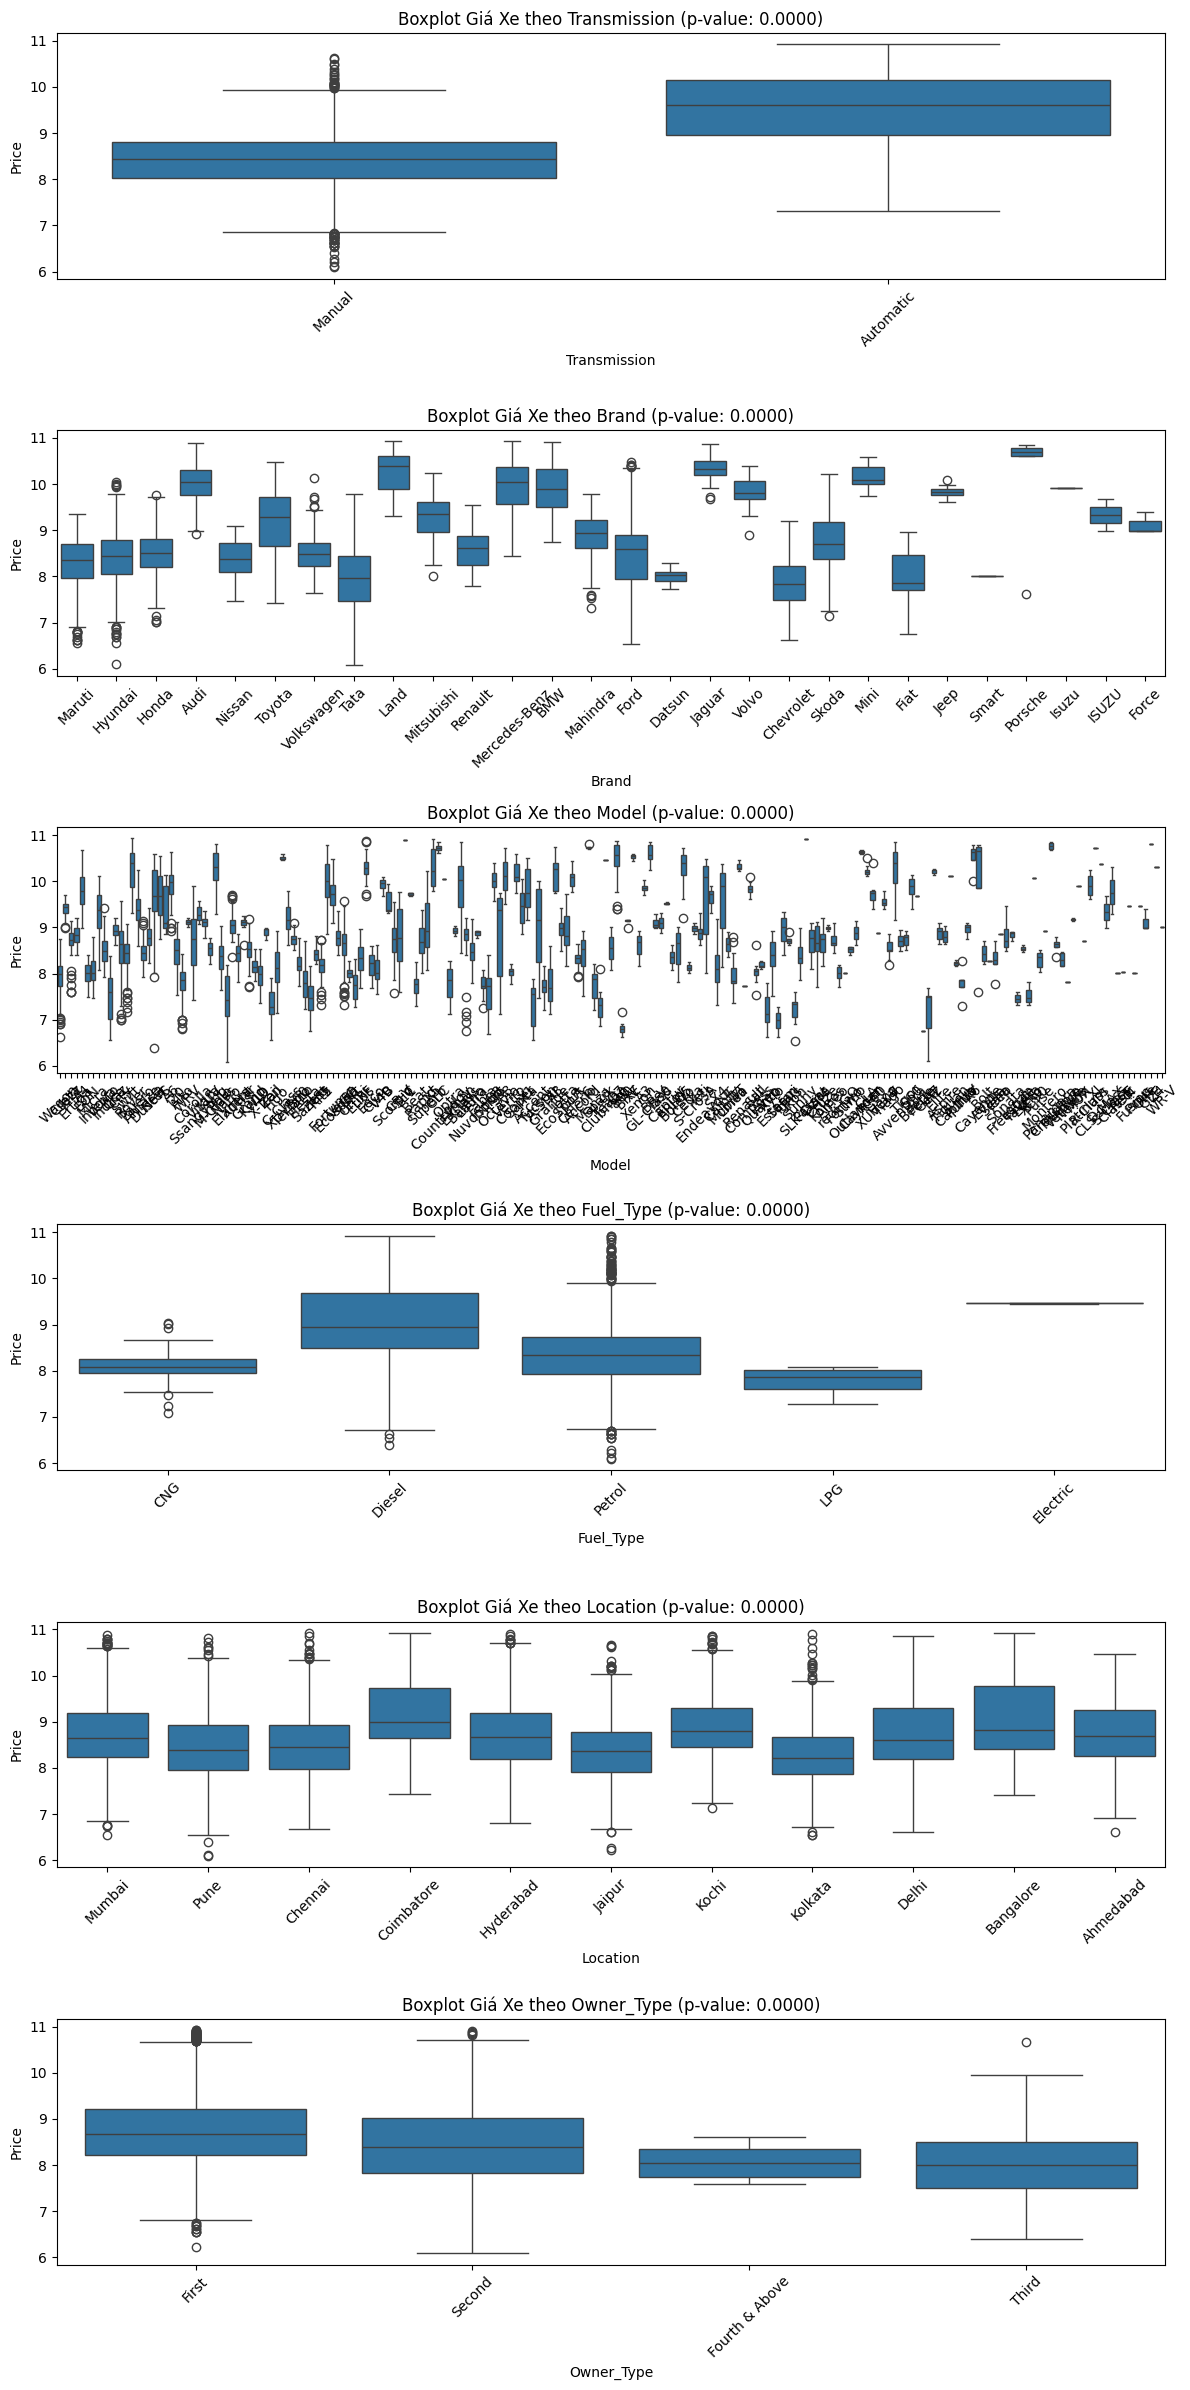

In [70]:
sorted_columns = [col for col, _ in sorted(significant_columns.items(), key=lambda x: x[1])]

plt.figure(figsize=(12, len(sorted_columns) * 4))  
for i, col in enumerate(sorted_columns, 1):
    plt.subplot(len(sorted_columns), 1, i)
    sns.boxplot(data=df, x=col, y='Price')
    plt.title(f"Boxplot Giá Xe theo {col} (p-value: {significant_columns[col]:.4f})")
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [71]:
# Các biến phân loại quan trọng
df_category_important = ['Transmission', 'Brand', 'Model', 'Fuel_Type', 'Location', 'Owner_Type']

## 5. Kết quả phân tích các biến quan trọng đã thăm dò được

In [72]:
print(f'Danh sách các biến số quan trọng: {df_numberic_important}')
print(f'Danh sách các biến phân loại quan trọng: {df_category_important}')

Danh sách các biến số quan trọng: ['Power', 'Engine', 'Age', 'Year', 'Mileage']
Danh sách các biến phân loại quan trọng: ['Transmission', 'Brand', 'Model', 'Fuel_Type', 'Location', 'Owner_Type']


In [73]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Age
0,Mumbai,2010,140124.132583,CNG,Manual,First,26.60,31.591138,7.626270,5.0,7.467942,Maruti,Wagon,14
1,Pune,2015,104800.206361,Diesel,Manual,First,19.67,39.774364,11.233877,5.0,9.433564,Hyundai,Creta,9
2,Chennai,2011,111346.442602,Petrol,Manual,First,18.20,34.626579,9.418068,5.0,8.412055,Honda,Jazz,13
3,Chennai,2012,153988.135175,Diesel,Manual,First,20.77,35.327043,9.421253,7.0,8.699681,Maruti,Ertiga,12
4,Coimbatore,2013,104352.627226,Diesel,Automatic,Second,15.20,44.362146,11.865918,5.0,9.783634,Audi,A4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,84253.885465,Diesel,Manual,First,28.40,35.327043,8.602325,5.0,8.466110,Maruti,Swift,10
6015,Jaipur,2015,164894.796600,Diesel,Manual,First,24.40,33.466401,8.426150,5.0,8.294300,Hyundai,Xcent,9
6016,Jaipur,2012,122176.044328,Diesel,Manual,Second,14.00,49.979996,10.583005,8.0,7.972811,Mahindra,Xylo,12
6017,Kolkata,2013,111346.442602,Petrol,Manual,First,18.90,31.591138,8.191459,5.0,7.882692,Maruti,Wagon,11


# MODELING

In [74]:
# 1. Split dữ liệu
X = df.drop(columns=["Price"])  # Các biến độc lập
y = df["Price"]  # Biến mục tiêu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# 2. Encode biến phân loại
categorical_features = ["Location", "Fuel_Type", "Transmission", "Owner_Type", "Brand", "Model"]
numerical_features = ["Year", "Kilometers_Driven", "Mileage", "Engine", "Power", "Seats", "Age"]

# Column Transformer để xử lý cả biến số và biến phân loại
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)


In [76]:
# 3. Chuẩn bị dữ liệu
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [77]:
# 4. Train mô hình
model = RandomForestRegressor(random_state=42)
model.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [78]:
# 5. Dự đoán
y_pred = model.predict(X_test_processed)

In [79]:
# 6. Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 0.1464545869847069
R2 Score: 0.9102454095103958


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Giả sử bạn đã có DataFrame df
# Xác định các đặc trưng phân loại và số
categorical_features = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Model']
numerical_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Age']

# Tách dữ liệu thành X (đặc trưng) và y (biến mục tiêu)
X = df.drop(columns=['Price'])  # Các đặc trưng
y = df['Price']  # Biến mục tiêu

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng một pipeline cho việc tiền xử lý và huấn luyện mô hình
# 1. Tiền xử lý: ColumnTransformer để xử lý biến phân loại và biến số
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),  # One-Hot Encoding cho biến phân loại
        ('num', StandardScaler(), numerical_features)  # Standard Scaling cho biến số
    ])

# 2. Xây dựng pipeline bao gồm tiền xử lý và mô hình học máy (RandomForestRegressor)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Tiền xử lý dữ liệu
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Mô hình hồi quy (RandomForest)
])

# Huấn luyện mô hình trên dữ liệu huấn luyện
pipeline.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = pipeline.predict(X_test)

# Đánh giá mô hình (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.056980232120746765


In [81]:
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.9096572754150416
